In [39]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [40]:
year = 2022 #GP year
gp = 'Spain' # GP name
event = 'FP1' # Q for qualifying, FP1 for free practice 1, R for race

In [41]:

# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
#fastf1.Cache.enable_cache('\cache')
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)


In [42]:
# Get qualification session
session = fastf1.get_session(year, gp, event)
session.load()
#laps.dropna(subset=['Driver'], inplace = True)
laps = session.laps.pick_accurate()

core           INFO 	Loading data for Spanish Grand Prix - Practice 1 [v2.2.3]
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 11: Position data is incomplete!
api         WARNING 	Driver 23: Position data is incomplete!
api         WARNING 	Driver 24: Position data is incomplete!
api         WARNING 	Driver 36: Position data is incomplete!
api         WARNING 	Driver 45: Position data is incomplete!
api      

In [43]:
# Get an array of all drivers
drivers = pd.unique(laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

['VER' 'RUS' 'SAI' 'MSC' 'DEV' 'HAM' 'VIP' 'OCO' 'TSU' 'MAG' 'STR' 'LEC'
 'ALO' 'GAS' 'LAT' 'VET' 'NOR' 'RIC' 'BOT' 'KUB']


In [44]:
# Get the pole lap
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

In [45]:
# Get all team colors
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

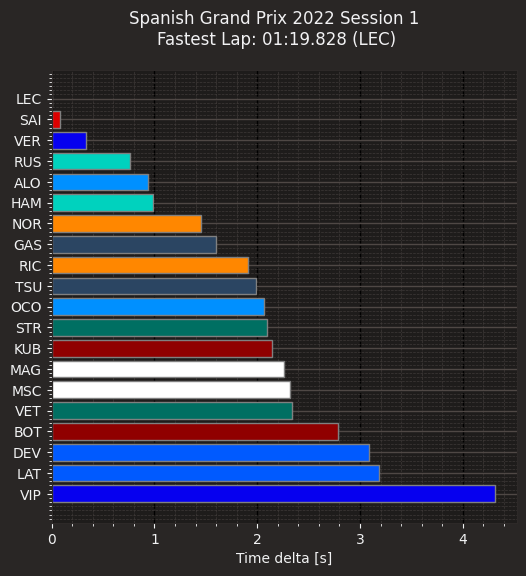

In [46]:
# Plot the table
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event.EventName} {session.event.year} Session 1 \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

In [47]:
medium_laps = laps.pick_tyre('MEDIUM').pick_accurate()
# Get the pole lap
drivers = pd.unique(medium_laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = medium_laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

#team_colors = list()
#for index, lap in fastest_laps.iterlaps():
#    color = fastf1.plotting.team_color(lap['Team'])
#    team_colors.append(color)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event.EventName} {session.event.year} Session 1 Medium tyre \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

['TSU' 'MAG' 'STR' 'GAS' 'LAT' 'RIC']


/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:2082: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  status (str): The track status as a string, e.g. '1'


AttributeError: Can only use .dt accessor with datetimelike values

['VER' 'RUS' 'SAI' 'MSC' 'DEV' 'HAM' 'VIP' 'OCO' 'TSU' 'MAG' 'STR' 'LEC'
 'ALO' 'GAS' 'LAT' 'VET' 'NOR' 'RIC' 'BOT' 'KUB']


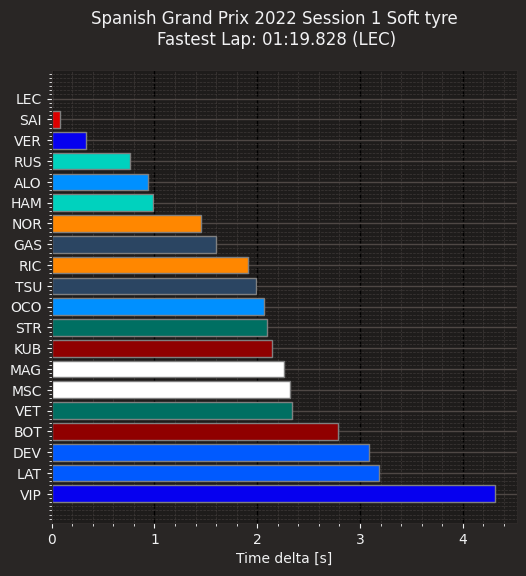

In [ ]:
soft_laps = laps.pick_tyre('SOFT').pick_accurate()
# Get the pole lap
drivers = pd.unique(soft_laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = soft_laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event.EventName} {session.event.year} Session 1 Soft tyre \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

In [50]:
hard_laps = laps.pick_tyre('HARD')
# Get the pole lap
drivers = pd.unique(hard_laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = hard_laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event.EventName} {session.event.year} Session 1 Hard tyre \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

['VER' 'RUS' 'SAI' 'MSC' 'DEV' 'HAM' 'VIP' 'OCO' 'LEC' 'ALO' 'VET' 'NOR'
 'BOT' 'KUB']


/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:2082: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  status (str): The track status as a string, e.g. '1'


AttributeError: 'numpy.float64' object has no attribute 'upper'

In [64]:
laps.pick_driver('VER').pick_tyre('MEDIUM')

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate


In [63]:
soft_laps.pick_fastest()

Time                      0 days 00:52:25.751000
DriverNumber                                  16
LapTime                   0 days 00:01:19.828000
LapNumber                                     14
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:22.391000
Sector2Time               0 days 00:00:29.929000
Sector3Time               0 days 00:00:27.508000
Sector1SessionTime        0 days 00:51:28.314000
Sector2SessionTime        0 days 00:51:58.243000
Sector3SessionTime        0 days 00:52:25.751000
SpeedI1                                    281.0
SpeedI2                                    302.0
SpeedFL                                    282.0
SpeedST                                    324.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre           